In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [323]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/HINDUNILVR.csv")

In [324]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
1,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
3,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
4,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN


In [325]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4791 non-null   float64
 14  %Deliverble         4791 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [326]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.791000e+03,4791.000000
mean,681.759037,682.294893,690.944139,672.909273,681.772974,681.799962,681.862976,2.079761e+06,1.288699e+14,56259.508958,1.331771e+06,0.603171
std,678.262430,679.340181,688.763295,668.803945,678.351376,678.356774,678.668946,3.043906e+06,5.296064e+14,48192.076558,2.295528e+06,0.120553
min,106.150000,103.100000,108.000000,100.500000,105.750000,106.150000,106.380000,1.875700e+04,7.824905e+11,459.000000,8.020000e+03,0.175400
25%,210.412500,210.500000,214.000000,207.112500,210.525000,210.412500,210.492500,1.010389e+06,3.468311e+13,28990.750000,6.336585e+05,0.522300
50%,298.100000,298.150000,302.000000,294.500000,297.675000,298.100000,298.185000,1.615984e+06,6.724330e+13,43874.000000,9.907800e+05,0.610300
75%,881.212500,881.025000,891.850000,871.137500,880.400000,881.212500,880.545000,2.553852e+06,1.269755e+14,67904.500000,1.616426e+06,0.688700
max,3141.250000,3165.700000,3234.000000,3050.000000,3130.000000,3141.250000,3166.540000,1.856700e+08,3.564334e+16,946784.000000,1.399438e+08,0.976700


In [327]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [328]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [329]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [330]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [331]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [332]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [333]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.544353,1.577022,2360.65,1946867,NaN
5302,1.423745,0.713077,2379.85,1668456,NaN
5303,3.325867,1.115546,2406.55,1951215,NaN
5304,2.717950,-1.043979,2407.60,3151150,NaN
5305,4.834245,-2.334025,2353.75,4010778,NaN


In [334]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [335]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [336]:
#Define the prediction model
model = RandomForestRegressor()

In [337]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [338]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9500931960945241


In [339]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [340]:
predictions = model.predict(X_Check)

In [341]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

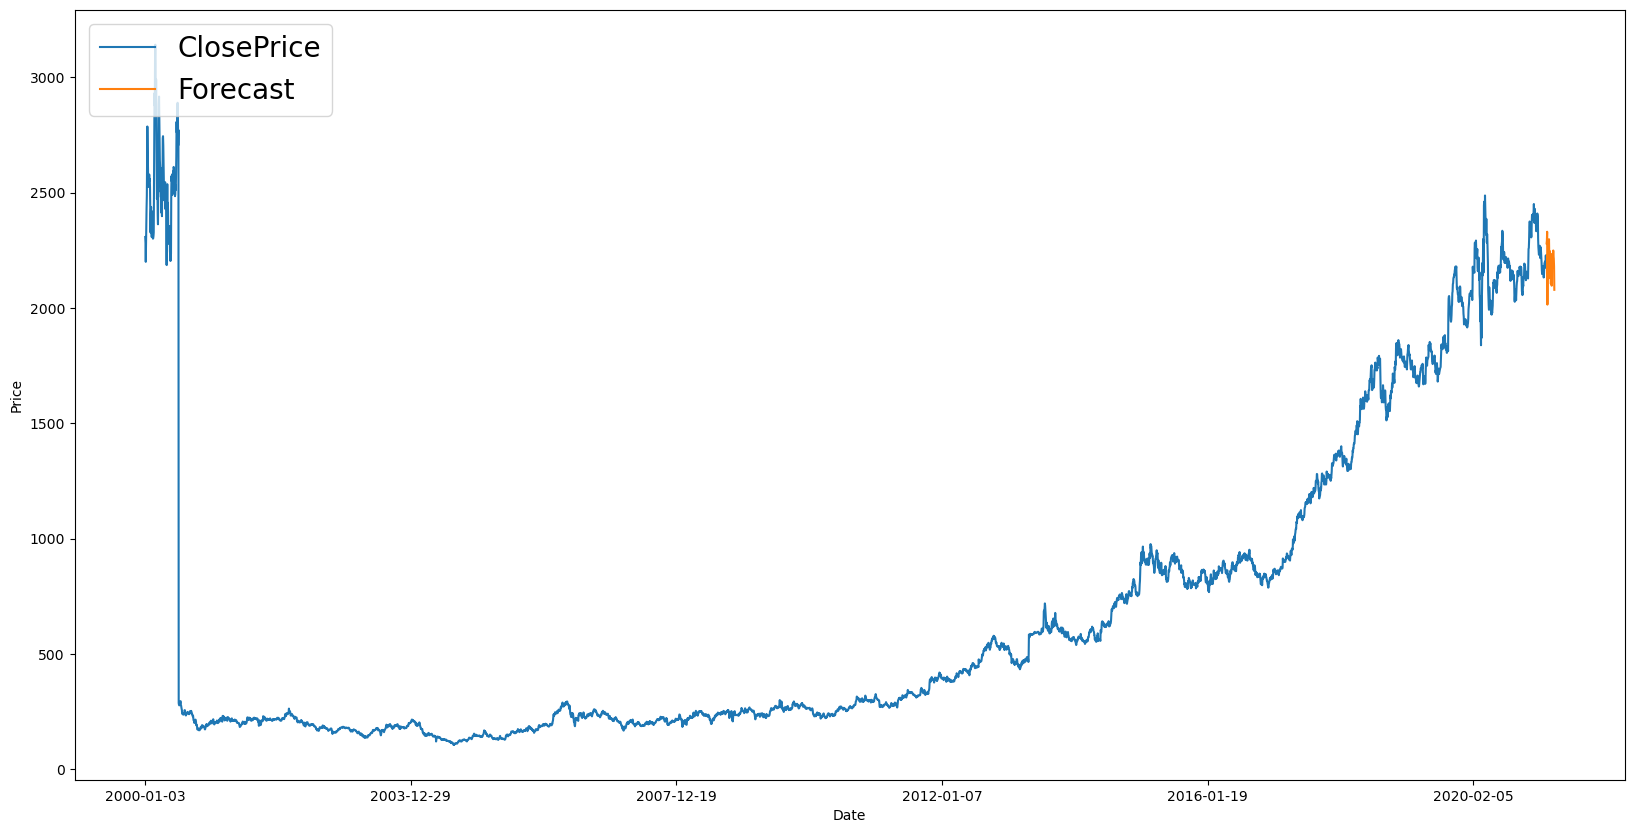

In [342]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')